In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#cd /content/drive/My Drive


/content/drive/My Drive


In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from keras.preprocessing import sequence
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [2]:

 
X=[]
Y=[]
for folder in os.scandir('./Audio'):
    for file in os.scandir(folder.path):
        print(file.name)
        y,sr=librosa.load(file.path)
        y=y[:10000]
        S = librosa.feature.melspectrogram(y=y, sr=sr)# transform to 2D
        X.append(S)
        Y.append(folder.name)
    


8770-295462-0010.wav
8770-295462-0011.wav
8770-295462-0012.wav
8770-295462-0013.wav
8770-295462-0014.wav
8770-295462-0020.wav
8770-295462-0021.wav
8770-295462-0022.wav
8770-295462-0023.wav
8770-295462-0024.wav
8770-295462-0025.wav
8770-295462-0026.wav
8770-295462-0027.wav
8770-295462-0028.wav
8770-295462-0029.wav
8770-295462-0037.wav
8770-295462-0038.wav
8770-295462-0039.wav
8770-295462-0040.wav
8770-295462-0041.wav
8797-294123-0000.wav
8797-294123-0001.wav
8797-294123-0002.wav
8797-294123-0013.wav
8797-294123-0014.wav
8797-294123-0015.wav
8797-294123-0016.wav
8797-294123-0017.wav
8797-294123-0023.wav
8797-294123-0024.wav
8797-294123-0025.wav
8797-294123-0026.wav
8797-294123-0027.wav
8797-294123-0028.wav
8797-294123-0029.wav
8797-294123-0037.wav
8797-294123-0038.wav
8797-294123-0039.wav
8797-294123-0040.wav
8797-294123-0041.wav
8838-298545-0000.wav
8838-298545-0001.wav
8838-298545-0002.wav
8838-298545-0003.wav
8838-298545-0010.wav
8838-298545-0011.wav
8838-298545-0012.wav
8838-298545-0

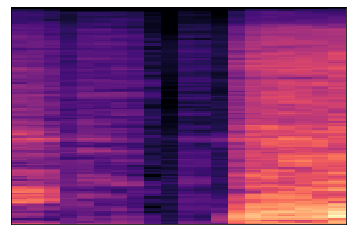

In [12]:
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

In [5]:
print(X)
print(y)

[array([[1.1855862e-03, 4.4069877e-03, 2.0493507e-02, ..., 1.8420342e-02,
        8.7419245e-03, 3.3617686e-03],
       [1.1046343e-03, 4.3572192e-03, 6.2441244e-03, ..., 7.6587424e-03,
        3.0968736e-03, 2.2255576e-03],
       [1.3045127e-03, 1.3061848e-03, 1.4266140e-03, ..., 9.1685932e-03,
        3.6549754e-02, 2.6201002e-02],
       ...,
       [4.5767859e-08, 1.4192892e-08, 3.7632533e-09, ..., 2.5086475e-09,
        2.7919642e-09, 6.3187429e-09],
       [6.4778284e-08, 1.7499060e-08, 1.5601462e-09, ..., 1.0927248e-09,
        1.5406270e-09, 3.3699177e-09],
       [7.9456782e-08, 1.9949219e-08, 1.3131864e-10, ..., 7.7932126e-11,
        1.3692902e-10, 2.5324602e-09]], dtype=float32), array([[4.1459021e-03, 8.2343938e-03, 4.2541162e-03, ..., 4.8110522e-03,
        4.4929851e-03, 6.4505944e-03],
       [1.2788091e-02, 2.2647202e-02, 2.2570066e-02, ..., 1.5571383e-02,
        6.7959495e-02, 4.1076805e-02],
       [6.6664335e-03, 4.3494869e-03, 2.6436392e-03, ..., 7.4196033e-02,
 

In [3]:
np.array(X).shape

(60, 128, 20)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(Y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), 
                                                    test_size=0.2, random_state=42)
#X_train=X_train.reshape([-1,120,120,1])
#X_test=X_test.reshape([-1,120,120,1])


import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

cnnModel = models.Sequential()

cnnModel.add(layers.Conv2D(8, (3,3), activation="relu", 
                           input_shape=(128, 20,1)))

cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu'))


cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dense(64,activation="relu"))
cnnModel.add(layers.Dropout(.5))
cnnModel.add(layers.Dense(1, activation="sigmoid"))

cnnModel.summary()


cnnModel.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
X_train = X_train.reshape(-1, 128, 20, 1)
cnnModel.fit(X_train, y_train, epochs=50, batch_size=32)
X_test=X_test.reshape(-1, 128, 20, 1)
testLoss, testAccuracy = cnnModel.evaluate(X_test, y_test)

print(testAccuracy)

cnnModel.save_weights('./my_checkpoint')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 18, 8)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 9, 8)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 7, 64)         4672      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 3, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 1, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [8]:
y_pred = (cnnModel.predict(X_test) > 0.5).astype("int32")

In [9]:
print(y_pred)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


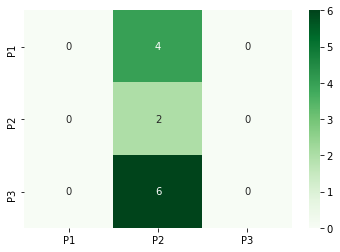

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='Greens', annot=True, xticklabels = ["P1", "P2", "P3"],yticklabels = ["P1", "P2", "P3"])


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      1.00      0.29         2
           2       0.00      0.00      0.00         6

    accuracy                           0.17        12
   macro avg       0.06      0.33      0.10        12
weighted avg       0.03      0.17      0.05        12



C:\Users\JaFsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
